In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Convolution2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#val_data=keras.utils.image_dataset_from_directory(
#directory="E:\DSspec\image classification of binary class\test_set"
#label="inferred",
#label_mode="int",
#batch_size=32,
#iamge_size=(256,256)
#)

In [4]:
S=64

#Data Augmentation

from keras.preprocessing.image import ImageDataGenerator

trainDatagen=ImageDataGenerator(
             rescale=1.0/255,
             shear_range=0.2,
             zoom_range=0.2,
             horizontal_flip = True)

testDatagen = ImageDataGenerator(rescale=1.0/255)

trainDataset = trainDatagen.flow_from_directory(
               r'E:\DSspec\image classification of binary class\training_set',
                target_size =(S,S),
                batch_size = 32,
                class_mode='binary')
testDataset = trainDatagen.flow_from_directory(
              r'E:\DSspec\image classification of binary class\test_set',
              target_size = (S,S),
              batch_size = 32,
              class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [5]:
model=Sequential()

model.add(Convolution2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Convolution2D(32,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Convolution2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 32)       128       
 hNormalization)                                                 
                                                        

In [7]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [9]:
history=model.fit_generator(trainDataset,epochs=3,validation_data=testDataset)

C:\Users\MY PC\AppData\Local\Temp\ipykernel_8396\2977536876.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(trainDataset,epochs=3,validation_data=testDataset)


Epoch 1/3
251/251 [==============================] - 54s 204ms/step - loss: 0.6889 - accuracy: 0.5826 - val_loss: 0.7514 - val_accuracy: 0.5042
Epoch 2/3
251/251 [==============================] - 38s 153ms/step - loss: 0.6147 - accuracy: 0.6593 - val_loss: 0.5847 - val_accuracy: 0.6891
Epoch 3/3
251/251 [==============================] - 39s 156ms/step - loss: 0.5805 - accuracy: 0.6907 - val_loss: 0.6375 - val_accuracy: 0.6303


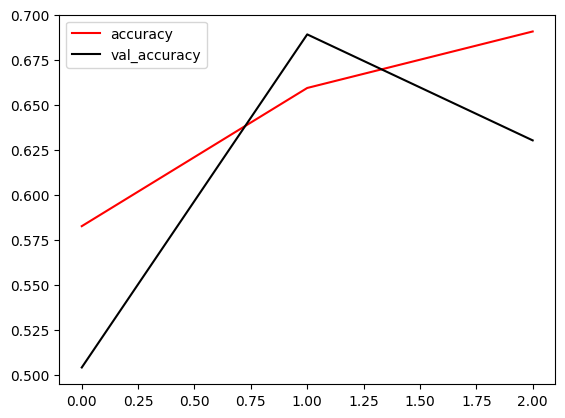

In [10]:
plt.plot(history.history["accuracy"],color='r',label="accuracy")
plt.plot(history.history["val_accuracy"],color='k',label="val_accuracy")
plt.legend()
plt.show()

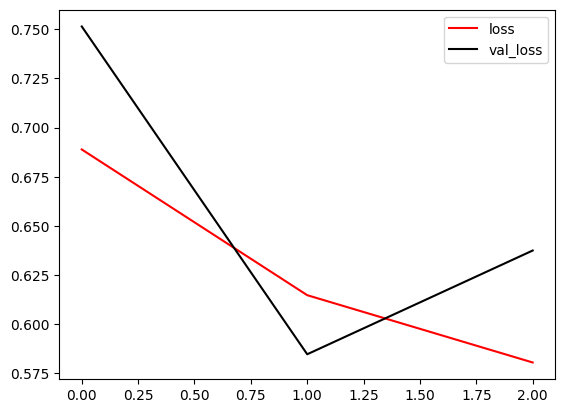

In [11]:
plt.plot(history.history["loss"],color='r',label="loss")
plt.plot(history.history["val_loss"],color='k',label="val_loss")
plt.legend()
plt.show()

In [12]:
history=pd.DataFrame(history.history)

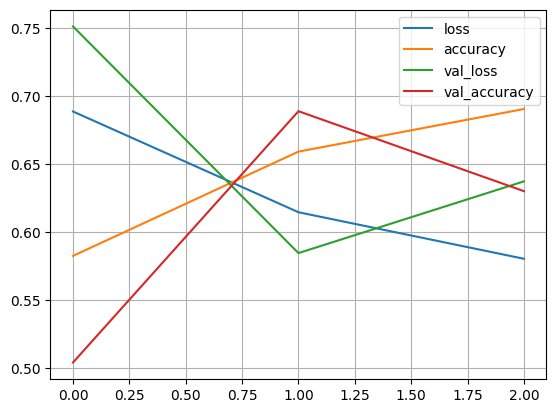

In [13]:
history.plot()
plt.grid()
plt.legend()
plt.show()

In [14]:
model.save("my.model.h5")

In [16]:
import cv2

In [17]:
im=cv2.imread('E:\DSspec\image classification of binary class\test_set\cats')

In [21]:
image=plt.imread(r'E:\DSspec\image classification of binary class\test_set\cats')
plt.imshow('image')

PermissionError: [Errno 13] Permission denied: 'E:\\DSspec\\image classification of binary class\\test_set\\cats'